In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
# pd.options.mode.chained_assignment = None  # default='warn'

In [39]:
# !gdown 1vuN_D5XG_Fc_vbayAbJ3SJaYfYN0JGnj

In [40]:
df = pd.read_csv('./VN_housing_dataset.csv')

In [41]:
df = df.drop(['Unnamed: 0'], axis=1)
df = df.dropna(subset = ['Ngày'])
df['Ngày']= pd.to_datetime(df['Ngày'])

In [42]:
df.head(3)

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,NaN,NaN,"86,96 triệu/m²"
1,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,NaN,NaN,"116,22 triệu/m²"
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82496 entries, 0 to 82495
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Ngày             82496 non-null  datetime64[ns]
 1   Địa chỉ          82449 non-null  object        
 2   Quận             82495 non-null  object        
 3   Huyện            82449 non-null  object        
 4   Loại hình nhà ở  82465 non-null  object        
 5   Giấy tờ pháp lý  53610 non-null  object        
 6   Số tầng          36399 non-null  object        
 7   Số phòng ngủ     82458 non-null  object        
 8   Diện tích        82495 non-null  object        
 9   Dài              19827 non-null  object        
 10  Rộng             35445 non-null  object        
 11  Giá/m2           82484 non-null  object        
dtypes: datetime64[ns](1), object(11)
memory usage: 8.2+ MB


In [44]:
df = df.dropna(subset=['Địa chỉ'])

In [45]:
df.loc[df['Quận'].isna(), 'Quận'] = 'Huyện Thanh Trì'

In [46]:
df.rename(columns = {'Loại hình nhà ở':'Loại_hình_nhà_ở', 'Giấy tờ pháp lý':'Giấy_tờ_pháp_lý',
                              'Số phòng ngủ':'Số_phòng_ngủ', 'Diện tích': 'Diện_tích', 'Địa chỉ': 'Địa_chỉ'}, inplace = True)

df['Huyện'].fillna('Chưa rõ', inplace=True)
df['Loại_hình_nhà_ở'].fillna('Chưa rõ', inplace=True)
df['Giấy_tờ_pháp_lý'].fillna('Chưa rõ', inplace=True)
df['Số_phòng_ngủ'].fillna('Chưa rõ', inplace=True)
df['Giá/m2'].fillna('Chưa rõ', inplace=True)

In [47]:
df.head(3)

,Ngày,Địa_chỉ,Quận,Huyện,Loại_hình_nhà_ở,Giấy_tờ_pháp_lý,Số tầng,Số_phòng_ngủ,Diện_tích,Dài,Rộng,Giá/m2
0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,NaN,NaN,"86,96 triệu/m²"
1,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",Chưa rõ,NaN,3 phòng,37 m²,NaN,NaN,"116,22 triệu/m²"
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²


In [48]:
# Drop cột 'Số tầng' do có giá trị null có nhiều
df = df.drop('Số tầng', axis = 1)
df = df.dropna(subset=['Diện_tích'])

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82448 entries, 0 to 82495
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Ngày             82448 non-null  datetime64[ns]
 1   Địa_chỉ          82448 non-null  object        
 2   Quận             82448 non-null  object        
 3   Huyện            82448 non-null  object        
 4   Loại_hình_nhà_ở  82448 non-null  object        
 5   Giấy_tờ_pháp_lý  82448 non-null  object        
 6   Số_phòng_ngủ     82448 non-null  object        
 7   Diện_tích        82448 non-null  object        
 8   Dài              19827 non-null  object        
 9   Rộng             35443 non-null  object        
 10  Giá/m2           82448 non-null  object        
dtypes: datetime64[ns](1), object(10)
memory usage: 7.5+ MB


# Loại bỏ outlier ở cột `Diện tích`

In [50]:
df['Diện_tích'] = df['Diện_tích'].str.replace(' m²', '').astype(float)
df['Dài'] = df['Dài'].str.replace(' m', '').astype(float)
df['Rộng'] = df['Rộng'].str.replace(' m', '').astype(float)

In [51]:
# Kiểm tra liệu có dòng nào với Dài * Rộng != Diện tích
rows_with_incorrect_area = df[np.abs(df['Dài'] * df['Rộng'] - df['Diện_tích']) > 1e-6]
if rows_with_incorrect_area.empty:
    print('All rows are correct. No need to change.')
else:
    print(rows_with_incorrect_area[['Dài', 'Rộng', 'Diện_tích']])

        Dài  Rộng  Diện_tích
5      12.1   3.8       46.0
8      12.0   6.5       75.0
14     15.2   3.9       52.8
15     12.0   4.2       52.0
28     12.0   4.2       45.0
...     ...   ...        ...
82355  13.0   3.0       37.0
82356  16.0   6.0      100.0
82359  14.0   5.0       80.0
82361  20.0   4.0       89.0
82362  20.0   4.0       90.0

[14321 rows x 3 columns]


Dataframe's shape before: (82448, 11) 

Dataframe's shape after: (80924, 11) 



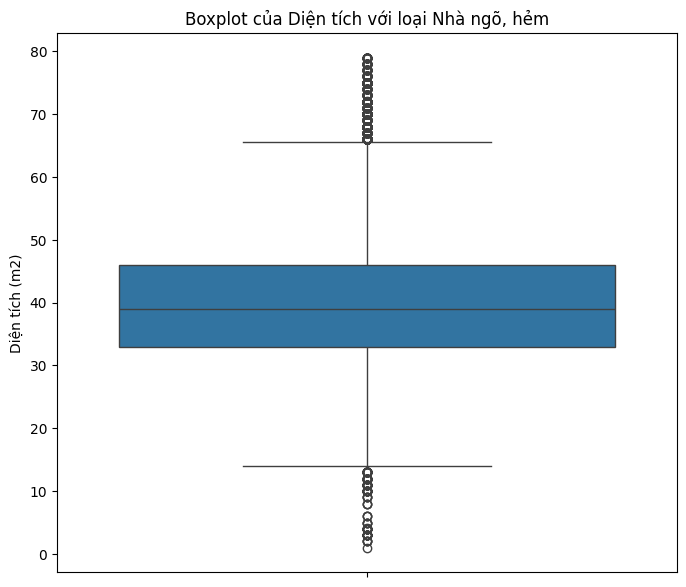

In [52]:
rows_to_drop = df.query('Diện_tích >= 80 & Loại_hình_nhà_ở == "Nhà ngõ, hẻm"').index

print('Dataframe\'s shape before:', df.shape, '\n')
df.drop(rows_to_drop, inplace=True)
print('Dataframe\'s shape after:', df.shape, '\n')

plt.figure(figsize=(8, 7))
sns.boxplot(y=df.query("Loại_hình_nhà_ở == 'Nhà ngõ, hẻm'")['Diện_tích'])
plt.ylabel('Diện tích (m2)')
plt.title('Boxplot của Diện tích với loại Nhà ngõ, hẻm')
plt.show()

Dataframe's shape before: (80924, 11) 

Dataframe's shape after: (80879, 11) 



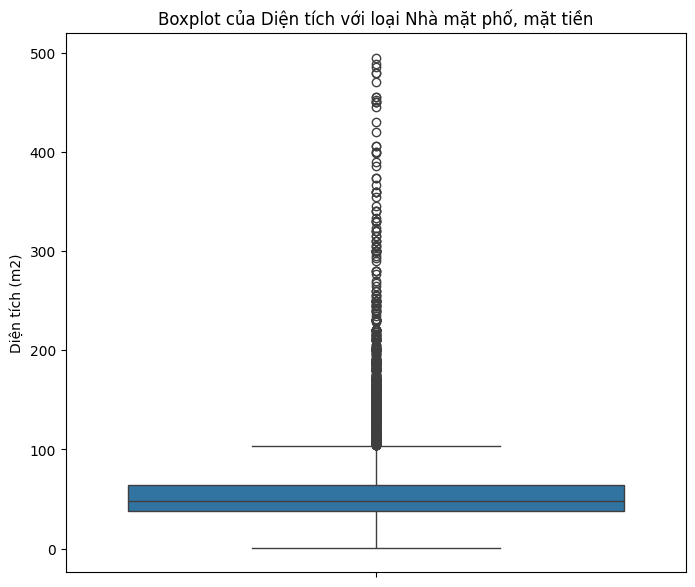

In [53]:
rows_to_drop = df.query('Diện_tích >= 500 & Loại_hình_nhà_ở == "Nhà mặt phố, mặt tiền"').index

print('Dataframe\'s shape before:', df.shape, '\n')
df.drop(rows_to_drop, inplace=True)
print('Dataframe\'s shape after:', df.shape, '\n')

plt.figure(figsize=(8, 7))
sns.boxplot(y=df.query("Loại_hình_nhà_ở == 'Nhà mặt phố, mặt tiền'")['Diện_tích'])
plt.ylabel('Diện tích (m2)')
plt.title('Boxplot của Diện tích với loại Nhà mặt phố, mặt tiền')
plt.show()


Dataframe's shape before: (80879, 11) 

Dataframe's shape after: (80869, 11) 



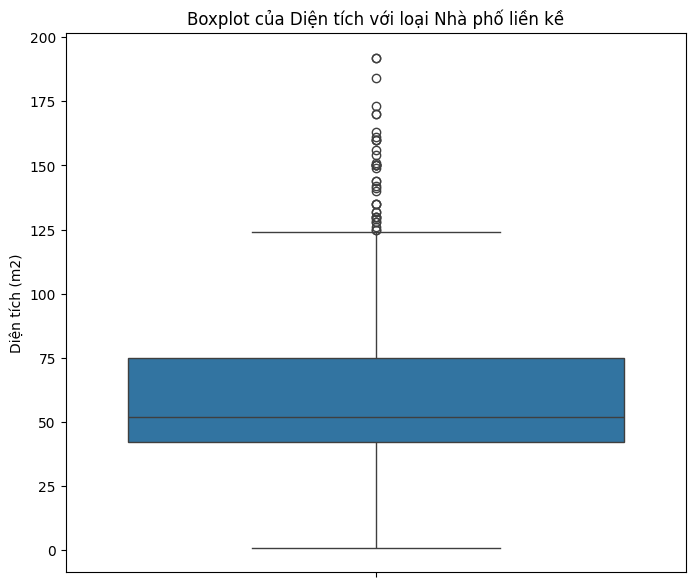

In [54]:
rows_to_drop = df.query('Diện_tích > 192 & Loại_hình_nhà_ở == "Nhà phố liền kề"').index

print('Dataframe\'s shape before:', df.shape, '\n')
df.drop(rows_to_drop, inplace=True)
print('Dataframe\'s shape after:', df.shape, '\n')

plt.figure(figsize=(8, 7))
sns.boxplot(y=df.query("Loại_hình_nhà_ở == 'Nhà phố liền kề'")['Diện_tích'])
plt.ylabel('Diện tích (m2)')
plt.title('Boxplot của Diện tích với loại Nhà phố liền kề')
plt.show()


Dataframe's shape before: (80869, 11) 

Dataframe's shape after: (80855, 11) 



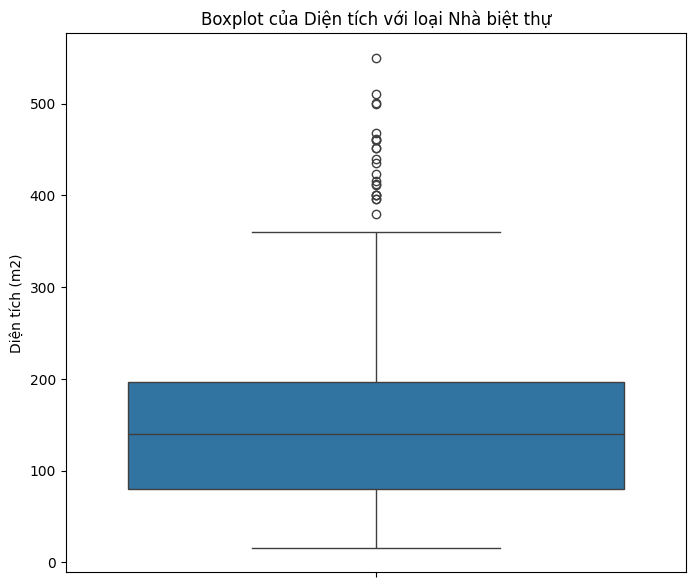

In [55]:
rows_to_drop = df.query('Diện_tích > 550 & Loại_hình_nhà_ở == "Nhà biệt thự"').index

print('Dataframe\'s shape before:', df.shape, '\n')
df.drop(rows_to_drop, inplace=True)
print('Dataframe\'s shape after:', df.shape, '\n')

plt.figure(figsize=(8, 7))
sns.boxplot(y=df.query("Loại_hình_nhà_ở == 'Nhà biệt thự'")['Diện_tích'])
plt.ylabel('Diện tích (m2)')
plt.title('Boxplot của Diện tích với loại Nhà biệt thự')
plt.show()


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80855 entries, 0 to 82495
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Ngày             80855 non-null  datetime64[ns]
 1   Địa_chỉ          80855 non-null  object        
 2   Quận             80855 non-null  object        
 3   Huyện            80855 non-null  object        
 4   Loại_hình_nhà_ở  80855 non-null  object        
 5   Giấy_tờ_pháp_lý  80855 non-null  object        
 6   Số_phòng_ngủ     80855 non-null  object        
 7   Diện_tích        80855 non-null  float64       
 8   Dài              19365 non-null  float64       
 9   Rộng             34621 non-null  float64       
 10  Giá/m2           80855 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 7.4+ MB


# Loại bỏ outlier ở cột `Dài`

Dataframe's shape before: (80855, 11) 

Dataframe's shape after: (80591, 11) 



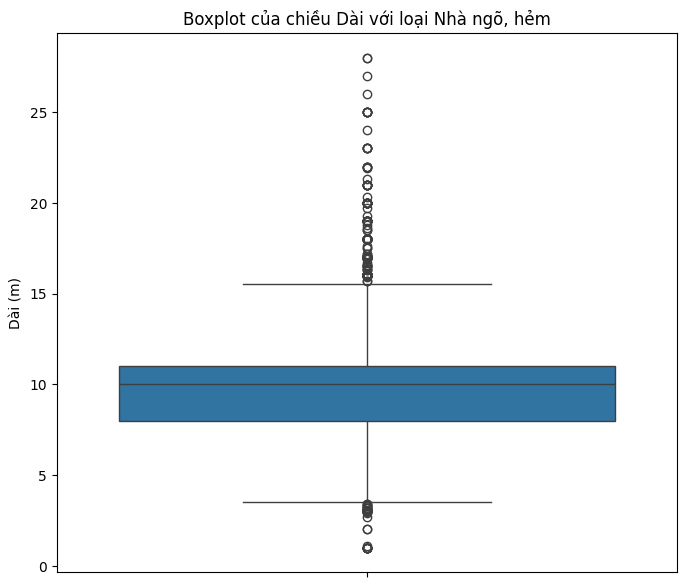

In [57]:
rows_to_drop = df.query('Dài >= 30 & Loại_hình_nhà_ở == "Nhà ngõ, hẻm"').index

print('Dataframe\'s shape before:', df.shape, '\n')
df.drop(rows_to_drop, inplace=True)
print('Dataframe\'s shape after:', df.shape, '\n')

plt.figure(figsize=(8, 7))
sns.boxplot(y=df.query("Loại_hình_nhà_ở == 'Nhà ngõ, hẻm'")['Dài'])
plt.ylabel('Dài (m)')
plt.title('Boxplot của chiều Dài với loại Nhà ngõ, hẻm')
plt.show()

Dataframe's shape before: (80591, 11) 

Dataframe's shape after: (80468, 11) 



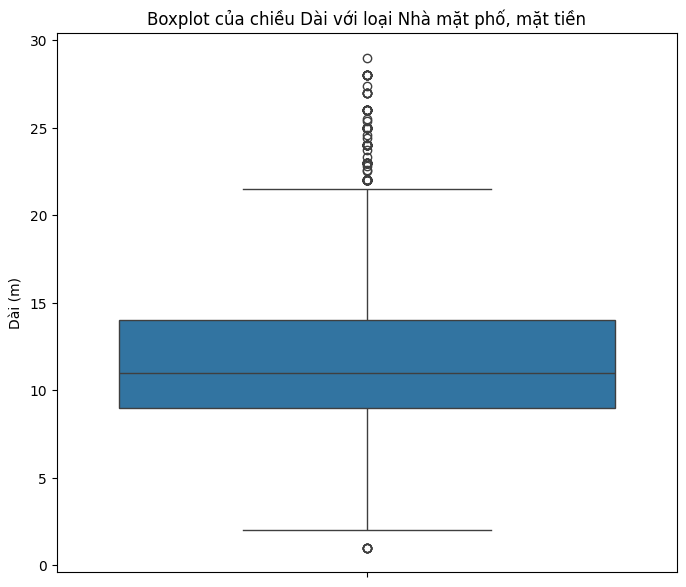

In [58]:
rows_to_drop = df.query('Dài >= 30 & Loại_hình_nhà_ở == "Nhà mặt phố, mặt tiền"').index

print('Dataframe\'s shape before:', df.shape, '\n')
df.drop(rows_to_drop, inplace=True)
print('Dataframe\'s shape after:', df.shape, '\n')

plt.figure(figsize=(8, 7))
sns.boxplot(y=df.query("Loại_hình_nhà_ở == 'Nhà mặt phố, mặt tiền'")['Dài'])
plt.ylabel('Dài (m)')
plt.title('Boxplot của chiều Dài với loại Nhà mặt phố, mặt tiền')
plt.show()

Dataframe's shape before: (80468, 11) 

Dataframe's shape after: (80452, 11) 



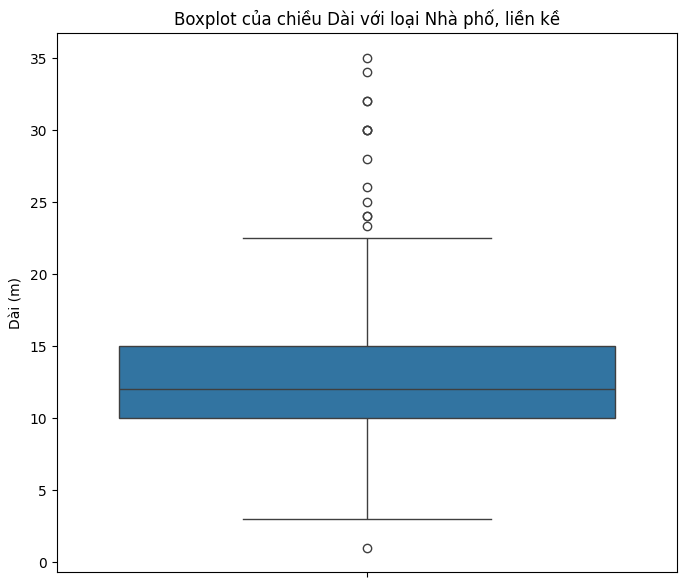

In [59]:
rows_to_drop = df.query('Dài >= 40 & Loại_hình_nhà_ở == "Nhà phố liền kề"').index

print('Dataframe\'s shape before:', df.shape, '\n')
df.drop(rows_to_drop, inplace=True)
print('Dataframe\'s shape after:', df.shape, '\n')

plt.figure(figsize=(8, 7))
sns.boxplot(y=df.query("Loại_hình_nhà_ở == 'Nhà phố liền kề'")['Dài'])
plt.ylabel('Dài (m)')
plt.title('Boxplot của chiều Dài với loại Nhà phố, liền kề')
plt.show()

Dataframe's shape before: (80452, 11) 

Dataframe's shape after: (80448, 11) 



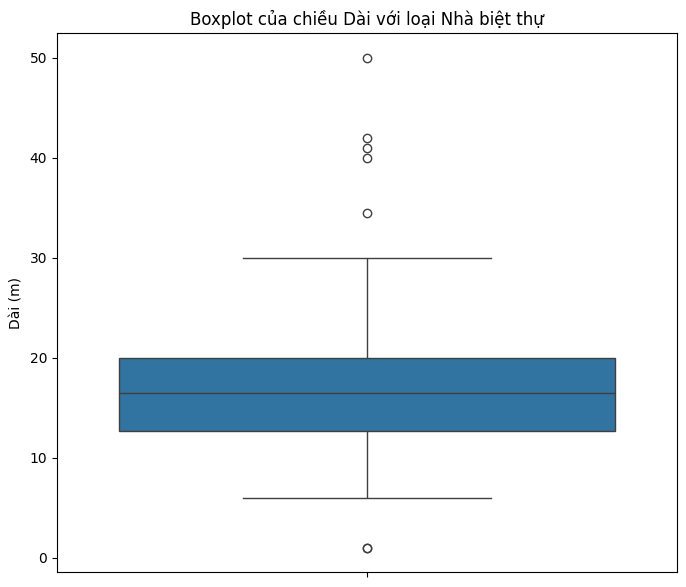

In [60]:
rows_to_drop = df.query('Dài >= 100 & Loại_hình_nhà_ở == "Nhà biệt thự"').index

print('Dataframe\'s shape before:', df.shape, '\n')
df.drop(rows_to_drop, inplace=True)
print('Dataframe\'s shape after:', df.shape, '\n')

plt.figure(figsize=(8, 7))
sns.boxplot(y=df.query("Loại_hình_nhà_ở == 'Nhà biệt thự'")['Dài'])
plt.ylabel('Dài (m)')
plt.title('Boxplot của chiều Dài với loại Nhà biệt thự')
plt.show()

Dataframe's shape before: (80448, 11) 

Dataframe's shape after: (80448, 11) 



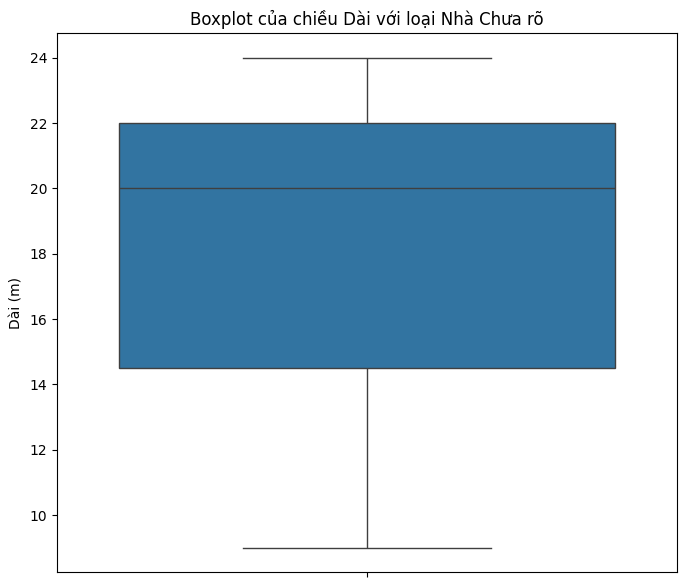

In [61]:
rows_to_drop = df.query('Dài >= 50 & Dài < 18 & Loại_hình_nhà_ở == "Chưa rõ"').index

print('Dataframe\'s shape before:', df.shape, '\n')
df.drop(rows_to_drop, inplace=True)
print('Dataframe\'s shape after:', df.shape, '\n')

plt.figure(figsize=(8, 7))
sns.boxplot(y=df.query("Loại_hình_nhà_ở == 'Chưa rõ'")['Dài'])
plt.ylabel('Dài (m)')
plt.title('Boxplot của chiều Dài với loại Nhà Chưa rõ')
plt.show()

# Fill các giá trị NaN ở cột `Dài` và `Rộng`

In [62]:
mean_col = df.groupby('Loại_hình_nhà_ở')['Dài'].mean().round()
mean_col

Loại_hình_nhà_ở
Chưa rõ                  18.0
Nhà biệt thự             17.0
Nhà mặt phố, mặt tiền    12.0
Nhà ngõ, hẻm             10.0
Nhà phố liền kề          13.0
Name: Dài, dtype: float64

In [63]:
# Fill những dòng cột Dài bị thiếu
df['Dài'] = df.apply(lambda x: mean_col[x['Loại_hình_nhà_ở']] if pd.isna(x['Dài']) else x['Dài'], axis=1)

In [64]:
# Tính chiều rộng của cột "Rộng" = Diện tích / Dài
df['Rộng'] = df.apply(lambda x: x['Diện_tích'] / x['Dài'] if pd.isna(x['Rộng']) else x['Rộng'], axis=1)
df.head(3)

,Ngày,Địa_chỉ,Quận,Huyện,Loại_hình_nhà_ở,Giấy_tờ_pháp_lý,Số_phòng_ngủ,Diện_tích,Dài,Rộng,Giá/m2
0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,5 phòng,46.0,10.0,4.600000,"86,96 triệu/m²"
1,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",Chưa rõ,3 phòng,37.0,12.0,3.083333,"116,22 triệu/m²"
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4 phòng,40.0,10.0,4.000000,65 triệu/m²


In [65]:
# Kiểm tra liệu có dòng nào với Dài * Rộng != Diện tích
rows_with_incorrect_area = df[np.abs(df['Dài'] * df['Rộng'] - df['Diện_tích']) > 1e-6]
if rows_with_incorrect_area.empty:
    print('All rows are correct. No need to change.')
else:
    print(rows_with_incorrect_area[['Dài', 'Rộng', 'Diện_tích']])

        Dài  Rộng  Diện_tích
5      12.1   3.8       46.0
6      10.0   4.5       52.0
7      12.0   6.8       32.0
8      12.0   6.5       75.0
9      10.0   3.5       41.0
...     ...   ...        ...
82357  10.0   4.0       20.0
82359  14.0   5.0       80.0
82360  10.0   3.0       34.0
82361  20.0   4.0       89.0
82362  20.0   4.0       90.0

[27959 rows x 3 columns]


In [66]:
df = df.drop(['Dài', 'Rộng'], axis = 1)

In [67]:
df.head(3)

,Ngày,Địa_chỉ,Quận,Huyện,Loại_hình_nhà_ở,Giấy_tờ_pháp_lý,Số_phòng_ngủ,Diện_tích,Giá/m2
0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,5 phòng,46.0,"86,96 triệu/m²"
1,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",Chưa rõ,3 phòng,37.0,"116,22 triệu/m²"
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4 phòng,40.0,65 triệu/m²


In [68]:
# Select rows where the 'Giá/m2' column contains the string 'tỷ/m²'
rows = df[df['Giá/m2'].str.contains('tỷ/m²')]

# Print the selected rows
print(rows['Giá/m2'])

1100     1,202777777 tỷ/m²
1144     1,142857142 tỷ/m²
1657            1,96 tỷ/m²
2849     1,557142857 tỷ/m²
2939     1,316666666 tỷ/m²
               ...        
78107    5,833333333 tỷ/m²
79034         1,0125 tỷ/m²
79835    1,706666666 tỷ/m²
80222            1,5 tỷ/m²
81845    2,538461538 tỷ/m²
Name: Giá/m2, Length: 115, dtype: object


In [69]:
def is_valid_price(price_string):
    # Kiểm tra nếu giá trị chứa nhiều hơn một dấu phẩy
    if price_string.count(',') > 1:
        return False
    return True

def convert_price_unit(price_string):
  if 'tỷ/m²' in price_string:
    # Remove 'tỷ/m²' and multiply by 1000 to convert to triệu/m²
    price_string = price_string.replace('tỷ/m²', '').replace('.', '').replace(',', '.')
    return float(price_string) * 1000
  elif 'đ/m²' in price_string:
    # Remove 'đ/m²' and divide by 1000000 to convert to triệu/m²
    price_string = price_string.replace('đ/m²', '').replace(',', '.')
    return float(price_string) / 1000000
  elif 'triệu/m²' in price_string:
    # Remove 'triệu/m²'
    price_string = price_string.replace('triệu/m²', '').replace(',', '.')
    return float(price_string)

# Lọc bỏ các giá trị không hợp lệ
df = df[df['Giá/m2'].apply(is_valid_price)]

# Áp dụng hàm convert_price_unit
df['Giá/m2'] = df['Giá/m2'].apply(convert_price_unit)

# Đổi tên cột
df.rename(columns={'Giá/m2': 'Giá/m2 (triệu/m2)'}, inplace=True)

# Hiển thị dataframe
df.head(3)


,Ngày,Địa_chỉ,Quận,Huyện,Loại_hình_nhà_ở,Giấy_tờ_pháp_lý,Số_phòng_ngủ,Diện_tích,Giá/m2 (triệu/m2)
0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,5 phòng,46.0,86.96
1,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",Chưa rõ,3 phòng,37.0,116.22
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4 phòng,40.0,65.00


In [70]:
def calculate_total_price(row):
  if row['Giá/m2 (triệu/m2)'] == 'Chưa rõ':
    return 'Chưa rõ'
  else:
    return row['Giá/m2 (triệu/m2)'] * row['Diện_tích']

df['Tổng_giá (Triệu đồng)'] = df.apply(calculate_total_price, axis=1)
df.head(3)

,Ngày,Địa_chỉ,Quận,Huyện,Loại_hình_nhà_ở,Giấy_tờ_pháp_lý,Số_phòng_ngủ,Diện_tích,Giá/m2 (triệu/m2),Tổng_giá (Triệu đồng)
0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,5 phòng,46.0,86.96,4000.16
1,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",Chưa rõ,3 phòng,37.0,116.22,4300.14
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4 phòng,40.0,65.00,2600.00


In [94]:
# Hàm để trích xuất tên đường từ địa chỉ
def extract_street(address):
    match = re.search(r'(Đường|phố|Phố) [^,]+', address)
    if match:
        return match.group(0)
    return None

# Áp dụng hàm để tạo cột 'Đường'
df['Đường'] = df['Địa_chỉ'].apply(extract_street)



In [ ]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [100]:
# Khởi tạo geolocator
geolocator = Nominatim(user_agent="openstreetmap.org")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# Hàm để lấy tọa độ từ địa chỉ
def get_coordinates(address):
    location = geocode(address)
    if location:
        return location.latitude, location.longitude
    return None, None

# Lấy danh sách các địa chỉ duy nhất
unique_addresses = df['Địa_chỉ'].unique()

# Tạo một DataFrame từ danh sách các địa chỉ duy nhất
unique_df = pd.DataFrame(unique_addresses, columns=['Địa_chỉ'])

# Chia DataFrame thành các chunk nhỏ
chunk_size = 100  # Điều chỉnh số lượng dòng trong mỗi chunk theo nhu cầu
chunks = [unique_df[i:i + chunk_size] for i in range(0, unique_df.shape[0], chunk_size)]

# Tạo danh sách để lưu trữ các chunk đã xử lý
processed_chunks = []

# Xử lý từng chunk
for chunk in chunks:
    chunk['lat'], chunk['long'] = zip(*chunk['Địa_chỉ'].apply(get_coordinates))
    processed_chunks.append(chunk)

# Gộp lại các chunk sau khi đã xử lý
processed_unique_df = pd.concat(processed_chunks, ignore_index=True)

# Merge lại với DataFrame gốc
result_df = pd.merge(df, processed_unique_df, on='Địa_chỉ', how='left')

# In DataFrame kết quả
print(result_df)

21.0463172 105.8049518
20.9826512 105.8157127
20.9958701 105.8613077
21.0145393 105.801834


KeyboardInterrupt: 

# Xử lý thêm cột kinh độ, vĩ độ từ cột địa chỉ.

In [96]:
df.to_csv('VN_housing_dataset_preprocessed.csv',index=False)
result_df.to_csv('result_df.csv',index=False)